# Task 1
Рассмотрим базу данных "mtcars" , содержащую информацию о 32
автомобилях, произведённых в 1973-74 годах. Для получения информации об этой базе, наберите "?mtcars" в языке R.
### Subtask i
 Отобразите диаграммы размаха переменной mpg (потребление топлива) в зависимости от перееменной cyl (количество
цилиндров).

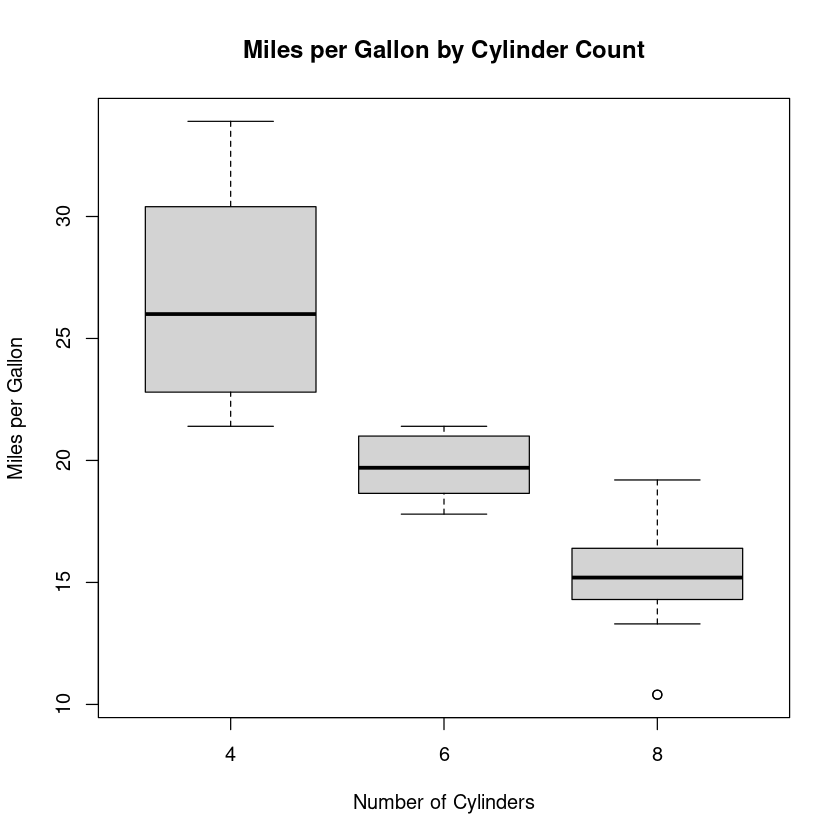

In [1]:
boxplot(mpg ~ cyl, data = mtcars, main = "Miles per Gallon by Cylinder Count",
        xlab = "Number of Cylinders", ylab = "Miles per Gallon")

### Subtask II
Протестируйте гипотезу о том, что медианное потребление
топлива в автомобилях с разным количеством цилиндров совпадает.

---
Применим тест Краскалла-Уолиса. Он используется для $\geqslant 3$ независимых групп

In [2]:
kruskal.test(mpg ~ cyl, data = mtcars)


	Kruskal-Wallis rank sum test

data:  mpg by cyl
Kruskal-Wallis chi-squared = 25.746, df = 2, p-value = 2.566e-06


Мы видим, что $p_{\text{value}} > \alpha = 0.05 \ \Rightarrow$ нулевая гипотеза о том, что все 3 группы одинаковые, отвергается

### Subtask III

Для каждого автомобиля с 8 цилиндрами (группа 1) найдите машину с 4 или 6 цилиндрами с максимально похожими характеристиками "disp" ,"hp" ,"drat" , "wt" , "qsec"(группа 2). В качестве меры близости используйте евклидово расстояние между стандартизованными показателями. Протестируйте гипотезу о том, что потребление в этих двух группах одинаково

In [3]:
data = scale(mtcars[, 3:7])
group_1 = which(mtcars$cyl == 8)
group_2 = which(mtcars$cyl != 8)

similar = rep(0, length(group_1))
distance = rep(0, length(group_2))
for (i in 1:length(group_1)) {
	for (j in 1:length(group_2)) {
		obj1 = data[group_1[i],]
		obj2 = data[group_2[j],]
		distance[j] = dist(rbind(obj1, obj2))
	}
	best_obj = group_2[which.min(distance)]
	similar[i] = mtcars$mpg[best_obj]
}

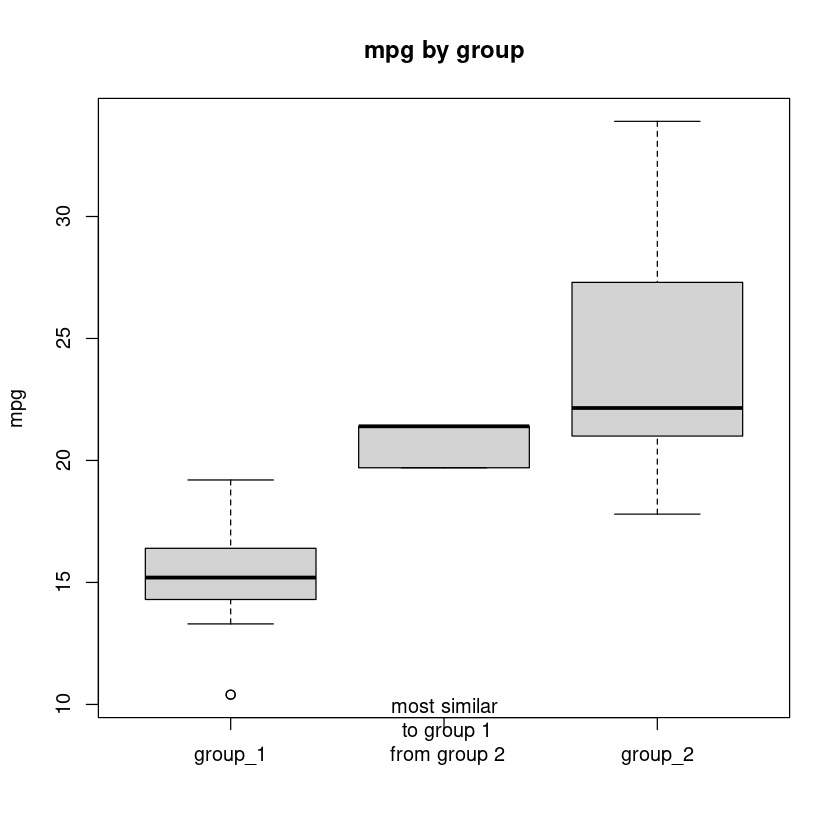

In [4]:
values = mtcars$mpg[group_1]
values_in_group_2 = mtcars$mpg[group_2[1:length(group_1)]]
boxplot(cbind(values, similar, values_in_group_2), ylab="mpg", main="mpg by group", names=c("group_1", "most similar\n to group 1\n from group 2", "group_2"))

В качестве теста будем использовать тест Уилконсона. Он используется для 2 групп и парных наблюдений

In [5]:
wilcox.test(values,similar,paired=TRUE)

Warning message in wilcox.test.default(values, similar, paired = TRUE):
“cannot compute exact p-value with ties”



	Wilcoxon signed rank test with continuity correction

data:  values and similar
V = 0, p-value = 0.001091
alternative hypothesis: true location shift is not equal to 0


$p_{\text{value}} = 0.0010 < \alpha = 0.05 \ \Rightarrow$ мы отвергаем нулевую гипотезу $\Rightarrow$ потребление топлива зависит от группы

# Task 2
Рассмотрим базу данных "swiss" , включающую в себя показатели рождаемости и различные социально-экономические индикаторы для 47 франкоговорящих провинций Швейцарии в 1888 году, см. https://stat.ethz.ch/R-manual/R-patched/library/datasets/html/swiss.html.

Целью данной задачи является анализ зависимости между рождаемостью и социально-экономическими индикаторами. Особенность 1 данных состоит в том, что большинство переменных представляют собой процентные соотношения

In [63]:
head(swiss)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6


### Subtask I
Разделите все провинции на 3 группы, которые мы будем обозначать C,P,M: C ("catolic") - более 80 % населения католики ; P("protestant") - более 80 % протестанты; M ("mixed")- "смешанные" провинции (не менее 20 % католики и не менее 20 % протестанты). Протестируйте гипотезу, что во всех трёх провинциях уровень рождаемости имеет одно и тоже распределение. Рассмотрите также гипотезу попарно (то есть, для групп C и P, C и M, P и M), используя наиболее подходящую альтернативу для каждой пары.

In [23]:
C = swiss[swiss$Catholic >= 80,]
P = swiss[swiss$Catholic < 20,]
M = swiss[(swiss$Catholic >= 20) & (swiss$Catholic < 80),]

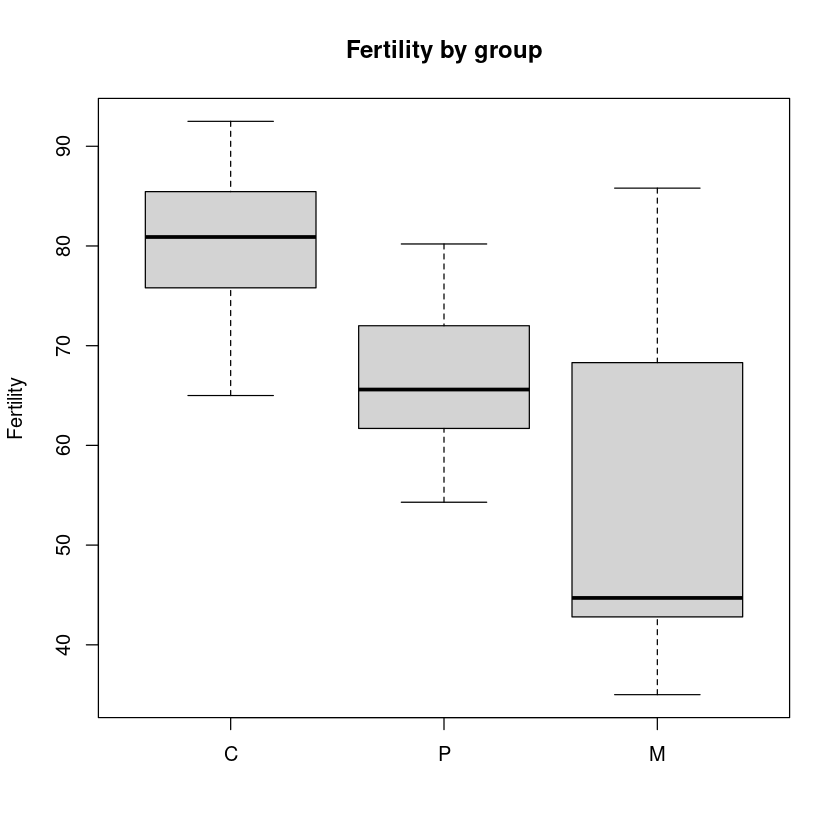

In [7]:
boxplot(list(C$Fertility, P$Fertility, M$Fertility), names=c("C", "P","M"), ylab="Fertility", main='Fertility by group')

Применим тест Краскалла-Уолиса. Он используется для $\geqslant 3$ независимых групп

In [8]:
kruskal.test(list(C$Fertility, P$Fertility, M$Fertility))


	Kruskal-Wallis rank sum test

data:  list(C$Fertility, P$Fertility, M$Fertility)
Kruskal-Wallis chi-squared = 18.948, df = 2, p-value = 7.681e-05


Видим, что $p_{\text{value}} = 7.681\cdot 10^{-5} < \alpha = 0.05 \Rightarrow$ отвергаем нулевую гипотезу о похожести групп

### Subtask II

Для каждой группы, полученной на предыдущем шаге, разделите провинции на 4 группы
1. более 50% мужчин работают в сельском хозяйстве и низкий уровень детской смертности (менее 1-ого квартиля детской смертности по всем провинциям);
2. менее 50% мужчин работают в сельском хозяйстве и низкий уровень детской смертности;
3. более 50% мужчин работают в сельском хозяйстве и высокий уровень детской смертности (более 1-ого квартиля детской смертности по всем провинциям);
4. менее 50% мужчин работают в сельском хозяйстве и высокий уровень детской смертности.

Вычислите средние значения показателя рождаемости в каждой подгруппе. Если в какой-то из подгрупп не будет наблюдений, замените медианным значением этой подгруппы по всем наблюдениям (без деления на C, P, M). Протестируйте гипотезу, что средний показатель рождаемости в каждой подгруппе одинаков для групп C, P, M.

In [14]:
aux_get_subgroup = function(group, agriculture_high_flg, mortality_high_flg) {
	mortality = quantile(group$Infant.Mortality, 0.25)
	if (agriculture_high_flg == 0 & mortality_high_flg == 0) {
		vals = (group$Fertility[(group$Agriculture < 50) & (group$Infant.Mortality < mortality)])
	} else if (agriculture_high_flg == 0 & mortality_high_flg == 1) {
		vals = (group$Fertility[(group$Agriculture < 50) & (group$Infant.Mortality > mortality)])
	} else if (agriculture_high_flg == 1 & mortality_high_flg == 0) {
		vals = (group$Fertility[(group$Agriculture > 50) & (group$Infant.Mortality < mortality)])
	} else if (agriculture_high_flg == 1 & mortality_high_flg == 1) {
		vals = (group$Fertility[(group$Agriculture > 50) & (group$Infant.Mortality > mortality)])
	}
	
	return (vals)
}

get_subgroup = function(group, agriculture_high_flg, mortality_high_flg) {
	vals = aux_get_subgroup(group, agriculture_high_flg, mortality_high_flg)
	if (length(vals) == 0) {
		vals = aux_get_subgroup(swiss, agriculture_high_flg, mortality_high_flg)
	}
	return (vals)
}

get_subgroup(C, 0, 0)

[1] 54.3 35.0

Далее я не совсем понял, какой дизайн теста, поэтому приведу сразу два варианта

#### Тест 1

Будем считать среднее значение для каждой подгруппы внутри каждой группы и с помощью теста Фридмана для $\geqslant 3$ парных величин проверим нулевую гипотезу о том, что группы одинаковы

Будем использовать тест Фридмана. Он используется для $\geqslant 3$ парных наблюдений

In [37]:
stat = matrix(NA, nrow=4,ncol=3)

for (agriculture_high_flg in 0:1) {
	for (mortality_high_flg in 0:1) {
		for (group_id in 1:3) {
			group = list(C, P, M)[[group_id]]
			val = median(get_subgroup(group, agriculture_high_flg, mortality_high_flg))
			i = agriculture_high_flg * 2 + mortality_high_flg + 1
			j = group_id
			stat[i, j] = val
		}
	}
}

stat

44.65,54.3,35.00
83.00,69.0,64.30
77.40,62.3,65.25
80.90,66.9,68.30


In [39]:
friedman.test(stat)


	Friedman rank sum test

data:  stat
Friedman chi-squared = 3.5, df = 2, p-value = 0.1738


Видим, что $p_{\text{value}} = 0.17 > \alpha = 0.05 \Rightarrow$ мы не можем отвергнуть нулевую гипотезу о том, что группы разные. Считаем, что группы одинаковые

#### Тест 2
Проведем 4 теста (для каждой из 4 подгрупп) и будем проверять гипотезу, что внутри каждой подгруппы значения распределены независимо от группы. Для проверки гипотезы будем использовать тест Краскалла-Уоллиса

In [166]:
#first subgroup
print("first subgroup")
kruskal.test(list(get_subgroup(C, 1, 0), get_subgroup(P, 1, 0), get_subgroup(M, 1, 0)))

#second subgroup
print("second subgroup")
kruskal.test(list(get_subgroup(C, 0, 0), get_subgroup(P, 0, 0), get_subgroup(M, 0, 0)))

#third subgroup
print("third subgroup")
kruskal.test(list(get_subgroup(C, 1, 1), get_subgroup(P, 1, 1), get_subgroup(M, 1, 1)))

#forth subgroup
print("forth subgroup")
kruskal.test(list(get_subgroup(C, 0, 1), get_subgroup(P, 0, 1), get_subgroup(M, 0, 1)))

[1] "first subgroup"



	Kruskal-Wallis rank sum test

data:  list(get_subgroup(C, 1, 0), get_subgroup(P, 1, 0), get_subgroup(M, 1, 0))
Kruskal-Wallis chi-squared = 4.798, df = 2, p-value = 0.09081


[1] "second subgroup"



	Kruskal-Wallis rank sum test

data:  list(get_subgroup(C, 0, 0), get_subgroup(P, 0, 0), get_subgroup(M, 0, 0))
Kruskal-Wallis chi-squared = 1.5, df = 2, p-value = 0.4724


[1] "third subgroup"



	Kruskal-Wallis rank sum test

data:  list(get_subgroup(C, 1, 1), get_subgroup(P, 1, 1), get_subgroup(M, 1, 1))
Kruskal-Wallis chi-squared = 8.6471, df = 2, p-value = 0.01325


[1] "forth subgroup"



	Kruskal-Wallis rank sum test

data:  list(get_subgroup(C, 0, 1), get_subgroup(P, 0, 1), get_subgroup(M, 0, 1))
Kruskal-Wallis chi-squared = 5.5526, df = 2, p-value = 0.06227


Видим, что на уровне значимости 0.05 можем отвергнуть только гипотезу, связанную с 3 подгруппой (более 50% работает в сельском хозяйстве, высокий уровень смертности). Для нее значение медиан неодинаково по группам C, P, M. Для остальных групп мы не можем отвергнуть нулевую гипотезу о равенстве медиан

# Task 3

Задано $N$ объектов, разделённых на $k$ групп, причём группа номер $j = 1\dots k$ состоит из $n_j$ элементов ($n_1 + ... + n_k = N$). Для каждого объекта известно значение $x_{ij}$ некоторой характеристики этого объекта. Докажите, что
$$
\sum_{j=1}^k \sum_{i =1}^{n_j}(x_{ij} - x_{\cdot \cdot})^2
= \sum_{j=1}^k \sum_{i=1}^{n_j} (x_{ij} - x_{\cdot j})^2 + \sum_{j=1}^k n_j (x_{\cdot j}- x_{\cdot \cdot})^2
$$

_Доказательство_

Запишем теорему Гюйгенса-Штейнера:
$$
\sum_{i=1}^Q m_i \| z_i - a \|^2
= \sum_{i=1}^Q m_i \| z_i - c \| + M \| c - a\|^2
$$
Положим 
$$m_i= 1, \ Q = n_j, \ z_i =x_{ij}, \ a = x_{\cdot \cdot}$$
Тогда
$$
M = \sum_{i=1}^Q m_i = n_j, \quad c = {\sum m_i z_i \over \sum m_i} = {\sum_{i =1}^{n_j} x_{ij} \over n_j} = x_{\cdot j}
$$
Получаем вид:
$$
\sum_{i=1}^{n_j} \| x_{ij} - x_{\cdot \cdot} \|^2  = \sum_{i=1}^{n_j} \| x_{ij} -x_{\cdot j} \|^2 + n_j \|x_{\cdot j} - x_{\cdot \cdot} \|^2
$$
Суммируя выражения выше по всем $j$ от $0$ до $k$ получаем требуемое

# Task 4
Пусть $(S1, ..., Sn)$ - вектор рангов, имеющий равномерное распределение на множестве $n!$ перестановок чисел $1, \dots, n$. Покажите, что

1. $\mathbb{E} S_i = {n + 1 \over 2}, \quad \forall i = \overline{1, n}$
2. $\operatorname{Var} S_i = {n^2 - 1 \over 12}, \quad \forall i = \overline{1, n}$
3. $\operatorname{cov} (S_i, S_j) = - {n + 1 \over 12}, \quad i, j = \overline{1, n},  \ i \neq j$

### Subtask 1
По определению
$$
\mathbb{E} S_i = \sum_{k=1}^n k_i  \mathbb{P}(S_i = 1)
$$
Существует $(n-1)!$ перестановок с фикисированным значением $S_i$. Всего перестановок $n!$. Значит,
$$
 \mathbb{P}(S_i=k) = {(n-1)! \over n!} = {1 \over n}
$$
Значит,
$$
\mathbb{E} S_i = \sum_{k= 1}^n k \cdot {1 \over n} = {n + 1 \over 2}
$$

### Subtask 2
Найдем второй момент:
$$
\mathbb{E} S_i^2 = \sum_{k = 1}^n k^2  \mathbb{P}(S_i = k) = {1 \over n} \sum k^2 = {1 \over n} {n (n+1) (2n + 1) \over 6} = {(n + 1)(2n + 1) \over 6}
$$
Дисперсия равна
$$
\mathbb{D} S_i = \mathbb{E}^2 S_i - \mathbb{E} S_i^2 = \Big ( {n + 1 \over 2} \Big)^2 -  {(n + 1)(2n + 1) \over 6} = \dots = {n^2 - 1 \over 12}
$$
### Subtask 3
Запишем формулу для ковариации:
$$
\operatorname{cov} (S_i, S_j) = \mathbb{E} S_i S_j - \mathbb{E} S_i \mathbb{E} S_j = \mathbb{E} S_i S_j - \mathbb{E}^2 S_i
$$
Найдем первое слагаемое:
$$
\mathbb{E} S_i S_j = \sum_{\substack{k = 1, \ l = 1 \\ l \neq k}}^n kl \mathbb{P}(S_i = k, S_j = l) = \sum_{k = 1}^n \sum_{l=1}^n kl  \mathbb{P}(S_i = k, S_j = l) - \sum_{k = 1}^n k^2  \mathbb{P}(S_i = k, S_j = k)
$$
Пользуясь тем, что
$$
\mathbb{P}(S_i = k, S_j= l) ={(n-2)! \over n!} = {1 \over n(n-1)} 
$$
находим:
$$
\mathbb{E} S_i S_j = {1 \over n(n- 1)} \sum_{k = 1}^n \sum_{l = 1}^n kl  - {1 \over n(n-1)} \sum_{k=1}^n k^2 = {1 \over n(n- 1)} \cdot \Big( {n (n+1) \over 2} \Big)^2 - {1 \over n(n-1)} \cdot {n (n+1 (2n + 1) \over 6} = \cdots = {1 \over 12} (n+1) (3n + 2)
$$
Теперь можем найти ковариацию:
$$
\operatorname{cov} (S_i, S_j) = \mathbb{E} S_i S_j - \mathbb{E}^2 S_i = {1 \over 12} (n+1) (3n + 2) - \Big ({n + 1 \over 2} \Big)^2 = -{n+1 \over 12}
$$

# Task 5
Докажите, что если коэффициент корреляции Спирмена $\hat \rho_S$ вычислен по независимым выборкам размера $n$, полученных из непрерывных распределений, то
$$
\operatorname{Var} \hat \rho_S = {1 \over n - 1}
$$

_Доказательство_

Для начала покажем, что
$$
\hat \rho_S = {12 \over n(n^2 - 1)} \sum_{i =1}^n (i S_i) - 3 {n + 1 \over n -1}
$$
Повторим выкладки, предложенные на [сайте](http://www.machinelearning.ru/wiki/index.php?title=Коэффициент_корреляции_Спирмена#:~:text=Коэффициент%20корреляции%20Спирмена%20(Spearman%20rank,любому%20монотонному%20преобразованию%20шкалы%20измерения)). Пусть есть два ранговых набора $(A_1, \dots A_n)$ и $(B_1, \dots B_n)$. Запишем эмпиричесую формулу для коэффициента корреляции:
$$
\hat \rho = {\sum_{i = 1}^n (A_i - \bar A) (B_i - \bar B) \over \sqrt{\sum_{i =1}^n (A_i - \bar A)^2 \sum_{i = 1}^n (B_i - \bar B)^2 }},  \quad \bar A = \bar B = {1 \over n} \sum_{i = 1}^n i = {n + 1 \over 2}
$$
Преобразуем множители в знаменателе:
$$
\sum_{i =1}^n (A_i - \bar A)^2 = \sum_{i = 1}^n (B_i - \bar B)^2 = \sum_{i=1}^n \Big(i - {n + 1 \over 2} \Big)^2
$$
Пользуясь тем, что
$$
\sum_{k=1}^n k = {n(n+1) \over 2}, \quad \sum_{k=1}^n k^2 = {n(n + 1)(2n + 1) \over 6}
$$
получаем
$$
\sum_{i=1}^n \Big(i - {n + 1 \over 2} \Big)^2 = {n(n-1)(n + 1) \over 12}
$$
Теперь переставим пары $(A_i, B_i)$ в порядке возрастания первой компоненты. Получим набор $(1, S_1), \dots (n, S_n)$. По сути мы просто переобозначили $A_i, B_i$. Тогда, переписывая знаменатель, получаем:
$$
\hat \rho = {12 \over n(n - 1)(n + 1)} \sum_{i=1}^n \Big(i - {n + 1 \over 2}\Big)^2 \Big(S_i - {n + 1 \over 2}\Big)^2
$$
Раскроем скобки:
$$
\hat \rho = {12 \over n(n^2 - 1)} \sum_{i = 1}^n (i S_i) - {6 \over n(n-1)} \sum_{i = 1}^n S_i - {6 \over n(n-1)} \sum_{i = 1}^n i +  {12 \over n(n^2 - 1)} \sum_{i = 1}^n \Big( {n + 1 \over 2}\Big)^2 = {12 \over n(n^2 - 1)} \sum_{i = 1}^n (i S_i) - 3{n + 1 \over n - 1}
$$
Теперь посчитаем дисперсию $\hat \rho$:
$$
\operatorname{Var} \hat \rho_s = \operatorname{Var} \Big[{12 \over n(n^2 - 1)} \sum_{i = 1}^n (i S_i) \Big] = \Big( {12 \over n (n^2- 1)}\Big)^2 \operatorname{Var} \Big[ \sum_{i = 1}^n (i S_i) \Big] = \Big( {12 \over n(n^2- 1)}\Big)^2 \cdot \Big(\underbrace{\sum_{i = 1}^n i^2 \operatorname{Var} S_i}_{A} + \underbrace{2 \sum_{1 \leqslant i < j \leqslant n} ij \operatorname{cov} (S_i, S_j)}_{B} \Big)
$$
Посчитаем $A$:
$$
A = \sum_{i = 1}^n i \operatorname{Var} S_i = {n^2 - 1 \over 12}  \cdot {n (n + 1)(2n + 1) \over 6}
$$
Посчитаем $B$:
$$
B = 2 \sum_{i < j} ij \operatorname{cov} (S_i, S_j) = 2 \cdot{-(n + 1) \over 12} \sum_{i < j} ij
$$
Вычислим последнюю сумму:
$$
\sum_{i < j} ij = {1 \over 2} \Big[\sum_{i = 1}^n \sum_{j=1}^n ij - \sum_{i = 1}^n i^2 \Big] = {1 \over 2} \Big[ \Big({n (n + 1) \over 2}\Big)^2 - {n(n + 1)(2n + 1) \over 6} \Big] = {(n - 1)n(n + 1)(3n + 2) \over 2 \cdot 12}
$$
Наконец, подставим все в общую формулу:
$$
\operatorname{Var} \hat \rho_S = \Big({12 \over n(n^2 - 1)}\Big)^2  \Big({n^2 - 1 \over 12} \cdot {n(n+1)(2n + 1) \over 6} -2 \cdot {n + 1 \over 12} \cdot {(n - 1)n(n + 1)(3n + 2) \over 2 \cdot 12} \Big) = 
$$
$$
= \Big({12 \over n(n^2 - 1)}\Big)^2  {(n + 1)^2 n^2 (n - 1) \over 12^2} = {1 \over n - 1}
$$